# Cosmology HW2
## Dino Bektesevic 24.04.2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import astropy.units as u
import astropy.constants as c
%matplotlib inline

Unless otherwise specified, please assume the concordance cosmology for this problem: (Ωm,ΩΛ,Ωr,h) =(0.30.7,10−4,0.7) hereh≡H0/[100 km/s/Mpc].1. hot dark matter

# 1. Consider a particle of mass m that decouples from other particles at temperatureT with $c^2m << kbT$.  Such a particle is called a hot thermal relic and there are strong limits on it being the dark matter.

## 1.a)  Calculate the comoving distance the particle can free stream from the moment of decoupling until the present. Consider the cases where FS is dominated by the contribution from when the Universe was either matter dominated or radiation dominated. Roughly what is  the m value below which the matter dominated limit is most applicable?

When matter dominated:
$$H = H_0 \sqrt{\Omega_{m,0}}(1+z)^{3/2}$$
when radiation dominated:
$$H = H_0 \sqrt{\Omega_{r,0}}(1+z)^2$$

The comoving distance traveled by such a particle is:

$$d = \int_{z_{\mathrm{decouple}}}^0\frac{vdz}{H(z)}$$

Particle travels the furthest distance while it remains highly relativistic $k_bT=mc^2$ and since $T=T_0(1+z)$:

$$z_{\mathrm{non-relativistic}} = \frac{c^2m}{k_bT_0}-1$$

Once particle is not relativisic anymore it just does not cover appreciable distance anymore, compared to distances traversed in particle's history. So we can approximate the top limit of the integral with $z_{\mathrm{non-relativistic}}$:

$$d = \int_{z_{\mathrm{non-relativistic}}}^{z_{\mathrm{decouple}}}\frac{cdz}{H(z)}$$

Adopting a matter dominated universe:

$$\begin{align*}
d &= \int_{z_{nr}}^{z_d}\frac{cdz}{H_0 \sqrt{\Omega_{m,0}}(1+z)^{3/2}} \\
d &= \frac{c}{H_0 \sqrt{\Omega_{m,0}}} \int_{z_{nr}}^{z_d}\frac{dz}{(1+z)^{3/2}} \\
d &= -\frac{2c}{H_0 \sqrt{\Omega_{m,0}}} \left.\frac{1}{\sqrt{1+z}}\right\vert_{z_{nr}}^{z_d} \\
d &= -\frac{2c}{H_0 \sqrt{\Omega_{m,0}}} \left(\frac{1}{\sqrt{1+z_d}} - \frac{1}{\sqrt{1+z_{nr}}} \right) \\
\text{In the limit:}& \lim_{z_d \rightarrow \infty} \frac{1}{\sqrt{1+z_d}} = 0 \\
d &= \frac{2c}{H_0 \sqrt{\Omega_{m,0}}} \frac{1}{\sqrt{\frac{c^2m}{k_bT_0}}} = \frac{2c}{H_0 \sqrt{\Omega_{m,0}}} \sqrt{\frac{k_bT_0}{c^2m}} = 270Mpc
\end{align*}$$

In the radiation dominated universe:

$$\begin{align*}
d &= \int_{z_{nr}}^{z_d}\frac{cdz}{H_0 \sqrt{\Omega_{r,0}}(1+z)^2} \\
d &= \frac{c}{H_0 \sqrt{\Omega_{r,0}}} \int_{z_{nr}}^{z_d}\frac{dz}{(1+z)^2} \\
d &= -\frac{c}{H_0 \sqrt{\Omega_{r,0}}} \left.\frac{1}{1+z}\right\vert_{z_{nr}}^{z_d} \\
d &= -\frac{c}{H_0 \sqrt{\Omega_{r,0}}} \left( \frac{1}{1+z_d} - \frac{1}{1+z_{nr}}  \right) \\
\text{In the limit:}& \lim_{z_d \rightarrow \infty} \frac{1}{1+z_d} = 0 \\
d &= \frac{c}{H_0 \sqrt{\Omega_{r,0}}} \frac{1}{\frac{c^2m}{k_bT_0}} = \frac{c}{H_0 \sqrt{\Omega_{r,0}}} \frac{k_bT_0}{c^2m} = 128Mpc
\end{align*}$$

The mass at which matter dominated limit becomes most applicable can be determined from:
$$kT = mc^2$$
by picking $T=9000K$ (z=3000)
$$m = kT/c^2 = 1.38 \cdot 10^{−36}kg \approx 0.77eV$$

In [2]:
mH = (c.k_B * 9000*u.K / c.c**2).si
(mH * c.c**2).to(u.eV)

<Quantity 0.77555973 eV>

In [3]:
T0 = 2.7*u.K
H0 = 70 * u.km/(u.s*u.Mpc)
#mH = 1.6735575*10**(-27) * u.kg
Om = 0.3
Or = 10**(-4)

( (2*c.c)/(H0*np.sqrt(Om)) * np.sqrt( (c.k_B*T0)/(c.c**2*mH) ) ).to(u.Mpc)

<Quantity 270.86485503 Mpc>

In [4]:
( (c.c)/(H0*np.sqrt(Or)) * (c.k_B*T0)/(c.c**2*mH) ).to(u.Mpc)

<Quantity 128.482482 Mpc>

## b) Use the above results to estimate the particle mass that suppresses objects of the size of dwarf galaxies ($10^{10}M_{sol}$), the Milky Way ($10^{12}M_{sol}$), and galaxy clusters ($10^{15}M_{sol}$).

From HW1 we know

$$r = \left( \frac{3}{4\pi} \frac{m}{\Omega_m\rho_c} \right)^{1/3}$$

and that 

| M (Msol)    | r      |
|-------------|--------|
|  $10^{10}$  |  0.388 |
|  $10^{12}$  |  1.802 |
|  $10^{15}$  | 18.020 |

We can set the comoving distance traveled equal to $r$

$$\begin{align*}
\frac{2c}{H_0 \sqrt{\Omega_{m,0}}} \sqrt{\frac{k_bT_0}{c^2m}} &= r \\
\sqrt{\frac{k_bT_0}{c^2m}} &= \frac{H_0 \sqrt{\Omega_{m,0}}}{2c}r \\
\frac{k_bT_0}{c^2m} &= \left( \frac{H_0 \sqrt{\Omega_{m,0}}}{2c}r \right)^2 \\
m &= \frac{k_bT_0}{c^2} \left( \frac{H_0 \sqrt{\Omega_{m,0}}}{2c}r \right)^{-2} \\
m &= \frac{k_bT_0}{c^2} \left( \frac{2c}{H_0 r\sqrt{\Omega_{m,0}}} \right)^2
\end{align*}$$

In [5]:
r = [0.38823193, 1.802013, 18.02013]* u.Mpc
mass = lambda x: c.k_B*T0/c.c**2 * ( (2*c.c)/(H0*np.sqrt(Om)*x) )**2
mass(r).si

<Quantity [6.72987582e-31, 3.12373161e-32, 3.12373161e-34] kg>

In [6]:
(mass(r) * c.c**2).to(u.keV)

<Quantity [3.77518350e+02, 1.75228494e+01, 1.75228494e-01] keV>

## c) What mH must the particle have to result in Ωm,0 = 0.25 and,hence, to be all the dark atter?  Do you foresee any problem with this dark matter candidate?

From conservation of entropy:

$$\begin{align*}
100T^3 V &= \left(2T_{CMB}^3 + 6\frac{7}{8}\frac{4}{11}T_\nu^3 \right)V \\
100T^3 &= \left(2T_{CMB}^3 + 6\frac{7}{8}\frac{4}{11}T_{CMB}^3\right) \\
T^3 &= \frac{1}{100} \left(2T_{CMB}^3 + \frac{21}{1}T_{CMB}^3\right) \\
T &= 0.92K
\end{align*}$$

From the definition of density:

$$\rho \approx m c_1 T^3$$

And then from definition of $\Omega$ we have the following:

$$\begin{align*}
\Omega &= \frac{\rho}{\rho_c} \\
0.25 &\approx \frac{m c_1 T^3}{\rho_c} \\
m &\approx \frac{\Omega \rho_c}{c_1 T^3}
\end{align*}$$

In [7]:
rhoc = 0.9*10**(-30) #3*H0**2/(8*np.pi*c.G)
Omega = 0.25
c1 = 60 #* 1/(u.K**3*u.m**3)
T = (1/100 * (2*T0**3 + 21/11*T0**3))**(1/3)
m = (Omega*rhoc)/(c1*(T**3).value) * u.g
m

<Quantity 4.87376074e-33 g>

In [8]:
(m * c.c**2).to(u.eV)

<Quantity 2.73397929 eV>

The particle is a bit too light to be dark matter.

# 2. 

## a) Solve numerically the Saha equation for xe(z) to yield the recombination history.  At what redshift is Recombination well under way such that xe≈0.1? What about xe≈0.9?

The Saha equation:

$$\begin{align*}
\frac{1-x_e}{x_e^2} = \frac{4\sqrt{2}\xi(3)}{\sqrt{\pi}} \left( \frac{k_BT}{m_ec^2} \right)^{3/2}& e^{\frac{I}{k_BT}} \\
\left[ \frac{4\sqrt{2}\xi(3)}{\sqrt{\pi}} \left( \frac{k_BT}{m_ec^2} \right)^{3/2} e^{\frac{I}{k_BT}} \right]x_e^2 + x_e - 1 &= 0\\
\left[ A (1+z)^{3/2} e^{\frac{I}{k_BT_0(1+z)}} \right]x_e^2 + x_e - 1 &= 0
\end{align*}$$

where A is given as:

$$ A = \frac{4\sqrt{2}\xi(3)}{\sqrt{\pi}} \left( \frac{k_BT_0}{m_ec^2} \right)^{3/2} $$

In [9]:
def saha(xe):
    """For a given Xe returns the quadratic equation for Xe(z)."""
    I = 13.6 * u.eV
    nu = 5*10**(-10)
    eps = 1.202
    T = 2.72 * u.K
    a = np.sqrt(2/np.pi) * 4*eps*nu * (c.k_B*T/(c.m_e*c.c**2))**(3/2)
    f = lambda z: a * (1+z)**(3/2) * np.exp(I/(c.k_B*T*(1+z))) * xe**2 + xe - 1
    return f

saha01 = saha(0.1)
saha09 = saha(0.9)
saha01_roots = fsolve(saha01, 1100)
saha09_roots = fsolve(saha09, 1100)
print(f"\n For Xe=0.1 the z={saha01_roots[0]} and for Xe=0.9 the z={saha09_roots[0]} \n")


 For Xe=0.1 the z=1257.0881026234554 and for Xe=0.9 the z=1475.8721097221407 



Lets drive the point home with a plot where the point of the problem is much easier to see.

In [10]:
def sahaInv(z):
    """Returns ionization fraction at a given redshift."""
    I = 13.6 * u.eV
    nu = 5*10**(-10)
    eps = 1.202
    T = 2.72 * u.K
    a = np.sqrt(2/np.pi) * 4*eps*nu * (c.k_B*T/(c.m_e*c.c**2))**(3/2)
    f = lambda xe: a * (1+z)**(3/2) * np.exp(I/(c.k_B*T*(1+z))) * xe**2 + xe - 1
    roots = fsolve(f, 0.5)
    return roots

def sahaInvSolver(z):
    """For an array of redshifts solves the ionization fraction."""
    # we can't map sahaInv directly because lambda 
    return np.fromiter(map(sahaInv, z), dtype=float)

/home/dinob/anaconda3/envs/cosmology/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


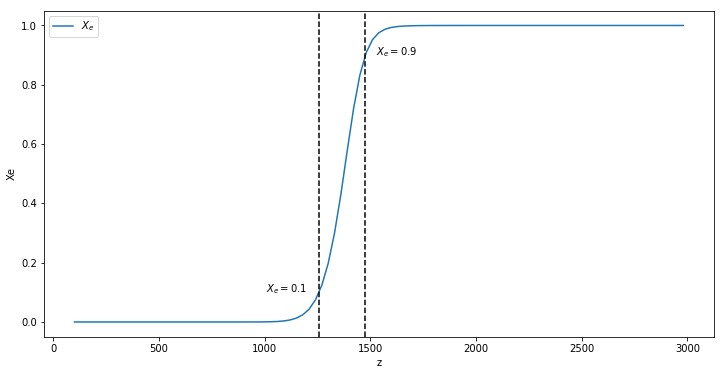

In [11]:
z = np.arange(100, 3000, 30)
xe = sahaInvSolver(z)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(z, xe, label=r"$X_e$")

ax.set_xlabel('z')
ax.set_ylabel('Xe')

ax.axvline(saha01_roots[0], c='black', ls='--')
plt.annotate(r"$X_e=0.1$", (saha01_roots[0]-250, 0.1))
ax.axvline(saha09_roots[0], c='black', ls='--')
plt.annotate(r"$X_e=0.9$", (saha09_roots[0]+50, 0.9))

plt.legend()
plt.show()

## b) Estimate the temperature, ionization fraction, and redshift at which reaction rate Γ falls below the Hubble expansion rate.

Equating reaction rate $\Gamma = <\sigma v> n_p$ with matter dominated Hubble expansion rate $H = H_0 \sqrt{\Omega_{m,0}} (1+z)^{3/2}$, keeping in mind that $X_e = n_p/n_b$, we have:

$$\begin{align*}
<\sigma v> n_p = H_0 \sqrt{\Omega_{m,0}} (1+z)^{3/2} \\
<\sigma v> X_e n_b = H_0 \sqrt{\Omega_{m,0}} (1+z)^{3/2}
\end{align*}$$

where $H_0$ $\Omega_{m,0}$ are given, we know that $X_e$ is a function of $z$ alone:

$$\left[ A (1+z)^{3/2} e^{\frac{I}{k_BT_0(1+z)}} \right]x_e^2 + x_e - 1 = 0$$

that 

$$<\sigma v> = 4.7\cdot 10^{-24}\sqrt{\frac{k_BT}{1eV}}c = 4.7\cdot 10^{-24}\sqrt{\frac{k_BT_0(1+z)}{1eV}}c cm^2$$

and that:

$$n_b = 2\cdot 10^{-7}(1+z)^3$$

Putting it all together:

$$\begin{align*}
4.7\cdot 10^{-24}\sqrt{\frac{k_BT_0(1+z)}{1eV}}ccm^2 X_e 2\cdot 10^{-7}(1+z)^3 &= H_0 \sqrt{\Omega_{m,0}} (1+z)^{3/2} \\
9.4\cdot 10^{-31}\sqrt{\frac{k_BT_0}{1eV}}ccm^2 X_e (1+z)^2  &= H_0 \sqrt{\Omega_{m,0}} \\
9.4\cdot 10^{-31}\sqrt{\frac{k_BT_0}{\Omega_{m,0} 1eV}}ccm^2 X_e (1+z)^2  - H_0 &= 0
\end{align*}$$

In [12]:
def sahaIonEqSys(z, forPlot=False):
    """Solves the Gamma = H equation."""
    # estimate <sigma v> at that z
    T0 = 2.7*u.K
    sigmav = 4.7*10**(-24) * np.sqrt( (c.k_B*T0*(1+z))/(1*u.eV) )*c.c*u.cm**2
    # estimate ionization fraction at that z
    xe = sahaInvSolver(z)
    # estimate nb
    nb = 2*10**(-7)*(1+z)**3 * 1/u.cm**3
    # calculate gamma
    gamma = sigmav*xe*nb  
    # calculate H
    Om = 0.3
    H0 = 70 * u.km/(u.s*u.Mpc)
    H  = H0 * np.sqrt(Om) * (1+z)**(3/2)
    
    # finally, find when the two are the same
    if forPlot:
        return gamma.si, H.si
    return (gamma-H).si

In [13]:
roots = fsolve(sahaIonEqSys, 1100)
xe = sahaInv(roots[0]) 
T = 2.7*u.K*(1+roots[0])
print(f"""

Reaction rate will reach the expansion rate at z={roots[0]}
Ionization fraction at that time is Xe={xe[0]}.
Temperature at that time is T={T}.

""")



Reaction rate will reach the expansion rate at z=1076.6597784141154
Ionization fraction at that time is Xe=0.002489017584750802.
Temperature at that time is T=2909.681401718112 K.




Since its also a minimal investment lets plot it too.

In [14]:
z = np.arange(800, 1200)
gamma_H0 = sahaIonEqSys(z, forPlot=True)

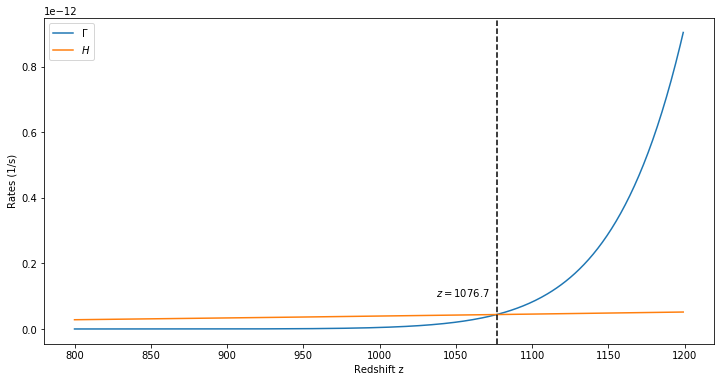

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(z, gamma_H0[0], label=r"$\Gamma$")
ax.plot(z, gamma_H0[1], label=r"$H$")

ax.set_ylabel('Rates (1/s)')
ax.set_xlabel('Redshift z')

ax.axvline(roots[0], c='black', ls='--')
plt.annotate(r"$z={0:.5}$".format(roots[0]), (roots[0]-40, 0.1*10**(-12)))
plt.legend()
plt.show()

## c) Estimate the residual fraction of electrons that will never recombine. 

Previously in (b) we calculated when the rate of the hubble expansion will be equal to recombination rate. After that the recombination stops because things are moving away from each other faster than they are recombining. The remaining fraction of ionized electrons will never recombine again. 

The residual fraction of never-to-recombine electrons is the same as in previous answer.

# 3 Explain qualitatively how the angular fluctuations in the CMB temperature would change if

## (a) The Thomson scattering cross section were ten times larger.

Larger Thompson cross-section means photons would be re-absorbed quicker. That means that the mean free path length would be shorter and subsequently there would be less mixing of photons at different energies originating from different regions. Diffusivity would be smaller, thus smaller scale perturbations would be better preserved.

## (b) There was no dark matter and instead all of the matter, with $\Omega_{m,0}$ = 0.3, was in baryons.

The electron density is directly proportional with $\Omega_{m,0}$, meaning that increase in $\Omega_{m,0}$ is an increase in electron number density and consequently a reduction of the mean free path and consequently a reduced effects of diffusivity are felt. This means small scale perturbations would be better preserved in the CMB.

## (c) There was an extra massless species of neutrinos (i.e. a fourth species leading to more relativistic degrees of freedom).

Adding neutrinos into the mix is effectively heping photons. Adding a new neutrino species is effectively adding more neutrinos to the universe, increasing its radiation density. This would further supress the growth of fluctiations on small scales. 

## (d) Reionization happened at z≈100 rather thanz≈8 as in our Universe.  [Hint:  First calculate the optical depth for a CMB photon to Thomson scatter on the free electrons reionization produces.]


$\tau = \sigma_T n_e L$ at larger z the density, i.e. $n_e$, is larger so the optical depth is larger, so everything looks more optically thick. We see less of CMB because $T = Te^{-\tau} + T_{CMB}(1-e^{-\tau})$.

## (e) We were able to observe in the CMB rest frame (rather than moving with peculiar velocity of vp= 680 km/s). 

We wouldn't see the dipole in the CMB. 